# PerspectiveTransformer Class

In [66]:
import numpy as np
from utils.perspective_transformer import PerspectiveTransformer

transformer = PerspectiveTransformer(4e-3, [0.0, 30.0, 0.0], (10.0, 10.0))

print(transformer.transform_to_ground_plane([(0.0, 0.0), (1e-3, 2e-3)]))

0.004 [[ 0.93015113  0.2095466  -0.30151134]
 [ 0.2095466   0.37136021  0.90453403]
 [ 0.30151134 -0.90453403  0.30151134]] [ -6.2863979  -11.1408063   27.13602101]
[(10.0, 9.999999999999996), (28.755609441270554, 30.53715671346956)]


# Visualization

## Dummy Data

In [67]:
transformer = PerspectiveTransformer(8e-3, [0.0, 30.0, 0.0], (20.0, 20.0))

coordinates = []
pixel_size = 0.1e-3 # in m

for i in range(56):
    for j in range(43):
        coordinates.append((- 0.5 * 5.6e-3 + i * pixel_size, - 0.5*4.3e-3 + j * pixel_size))

values = []
for _ in range(56):
    for j in range(43):
        values.append(43-j)


0.008 [[ 0.84156038  0.23765942 -0.48507125]
 [ 0.23765942  0.64351087  0.72760688]
 [ 0.48507125 -0.72760688  0.48507125]] [ -7.12978269 -19.30532596  21.82820625]


In [68]:
coordinates = [(-2.8e-3, -2e-3), (-2.8e-3, 2e-3), (-2.8e-3, 0), (0, 0), (0, 2e-3), (0, -2e-3), (2.8e-3, 2e-3), (2.8e-3, 0), (2.8e-3, -2e-3)]
values = [1, 1, 1, 2, 2, 2, 3, 3, 3]

x_values = np.linspace(-2.8e-3, 2.8e-3, 300)
y_values = np.linspace(-2e-3, 2e-3, 200)
xx, yy = np.meshgrid(x_values, y_values)
coordinates = list(zip(xx.flatten(), yy.flatten()))

def deduce_value(coord):
    return coord[0] + 3e-3

values = [deduce_value(coord) for coord in coordinates]

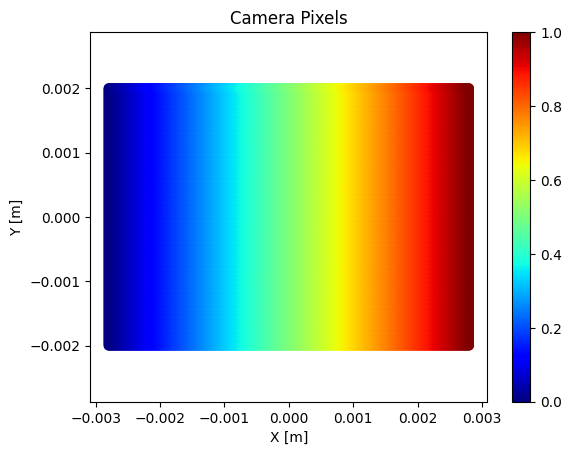

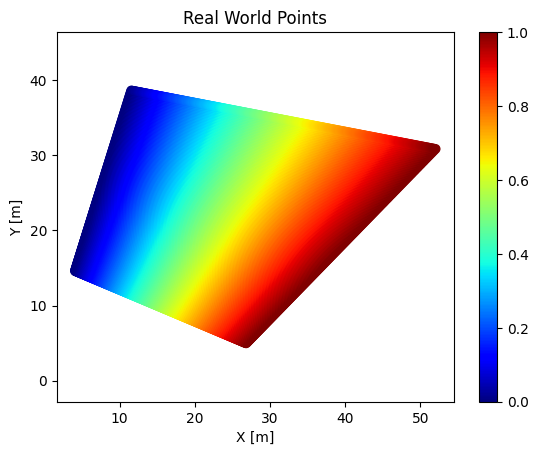

In [69]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'coordinates' is a list of [x, y, z] data points  
# Extract x, y, and z values from the coordinates list  
x_coordinates = [coord[0] for coord in coordinates]
y_coordinates = [coord[1] for coord in coordinates]

# Normalize z_values for color mapping
z_normalized = (np.array(values) - min(values)) / (max(values) - min(values))

# Create a scatter plot with colors mapped to z values
scatter = plt.scatter(x_coordinates, y_coordinates, c=z_normalized, cmap=cm.jet)

# Add a color bar
plt.colorbar(scatter)

# Set the title and axis labels
plt.title('Camera Pixels')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.axis('equal')  # Ensure equal aspect ratio

# Show the plot
plt.show()

#############################################
transformed_coordinates = transformer.transform_to_ground_plane(coordinates)

# Assuming 'coordinates' is a list of [x, y, z] data points  
# Extract x, y, and z values from the coordinates list  
x_coordinates = [coord[0] for coord in transformed_coordinates]
y_coordinates = [coord[1] for coord in transformed_coordinates]

# Normalize z_values for color mapping
z_normalized = (np.array(values) - min(values)) / (max(values) - min(values))

# Create a scatter plot with colors mapped to z values
scatter = plt.scatter(x_coordinates, y_coordinates, c=z_normalized, cmap=cm.jet)

# Add a color bar
plt.colorbar(scatter)

# Set the title and axis labels
plt.title('Real World Points')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.axis('equal')  # Ensure equal aspect ratio

# Show the plot
plt.show()



## Real Density

In [70]:
from azure.storage.blob import BlobServiceClient
import json
import numpy as np

blob_service_client = BlobServiceClient.from_connection_string(
        "DefaultEndpointsProtocol=https;AccountName=tensorastorage;AccountKey=OTC+4iQJevvteUOTaTO+N7GYRJkuUNyEieCOGIdRwno9h7BByPMKBi5uRG50DgYICDoyqFn0ZraE+AStUQb4MQ==;EndpointSuffix=core.windows.net"
    )
blob_client = blob_service_client.get_blob_client("cc-images-bad-segeberg", "stage_right_standard_2024-05-18_18-35-39_density.json")

density = np.array(json.loads(blob_client.download_blob().readall())["prediction"])


In [71]:
half_sensor_width = 0.5*5.76e-3
half_sensor_height = 0.5*3.24e-3

x_values = np.linspace(-half_sensor_width, half_sensor_width, density.shape[1])
y_values = np.linspace(half_sensor_height, -half_sensor_height, density.shape[0])

xx, yy = np.meshgrid(x_values, y_values)
coordinates = list(zip(xx.flatten(), yy.flatten()))

0.0028 [[ 1.          0.          0.        ]
 [ 0.          0.77493586  0.63203988]
 [ 0.         -0.63203988  0.77493586]] [-14.25        -8.91176237   7.26845867]
14400


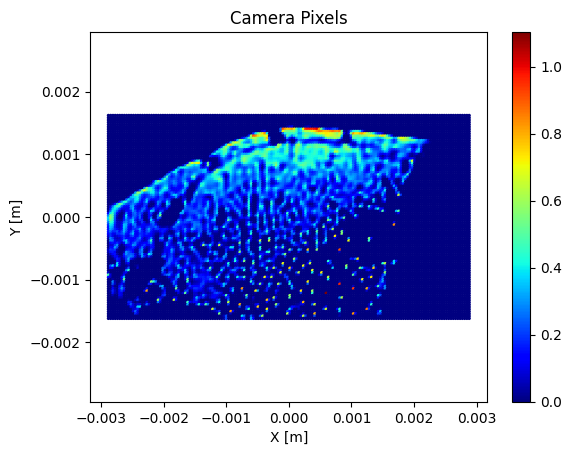

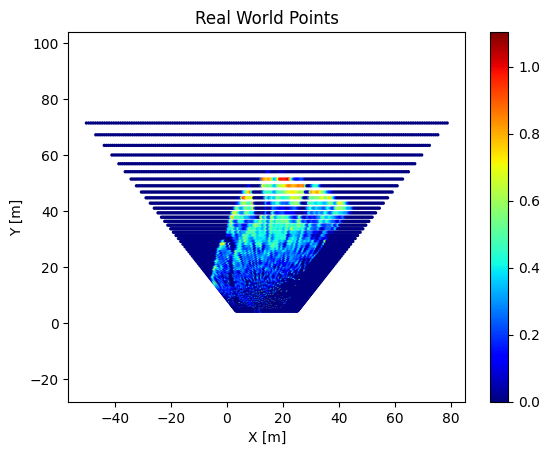

In [72]:
transformer = PerspectiveTransformer(2.8e-3, [14.25, 11.5, 0.0], (14.25, 14.1))

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'coordinates' is a list of [x, y, z] data points  
# Extract x, y, and z values from the coordinates list  
x_coordinates = [coord[0] for coord in coordinates]
y_coordinates = [coord[1] for coord in coordinates]
print(len(x_coordinates))

values = density.flatten()

# Create a scatter plot with colors mapped to z values
scatter = plt.scatter(x_coordinates, y_coordinates, c=values, cmap=cm.jet, s=2)

# Add a color bar
plt.colorbar(scatter)

# Set the title and axis labels
plt.title('Camera Pixels')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.axis('equal')  # Ensure equal aspect ratio

# Show the plot
plt.show()

#############################################
transformed_coordinates = transformer.transform_to_ground_plane(coordinates)

# Assuming 'coordinates' is a list of [x, y, z] data points  
# Extract x, y, and z values from the coordinates list  
x_coordinates = [coord[0] for coord in transformed_coordinates]
y_coordinates = [coord[1] for coord in transformed_coordinates]

# Create a scatter plot with colors mapped to z values
scatter = plt.scatter(x_coordinates, y_coordinates, c=values, cmap=cm.jet, s=2)

# Add a color bar
plt.colorbar(scatter)

# Set the title and axis labels
plt.title('Real World Points')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.axis('equal')  # Ensure equal aspect ratio

# Show the plot
plt.show()

In [73]:
transformed_coordinates = transformer.transform_to_ground_plane(coordinates)

x_coordinates = np.array([coord[0] for coord in transformed_coordinates])
y_coordinates = np.array([coord[1] for coord in transformed_coordinates])
print(y_coordinates[-10:-1])

real_world_density = list(zip(x_coordinates, y_coordinates, values))

[4.35621889 4.35621889 4.35621889 4.35621889 4.35621889 4.35621889
 4.35621889 4.35621889 4.35621889]


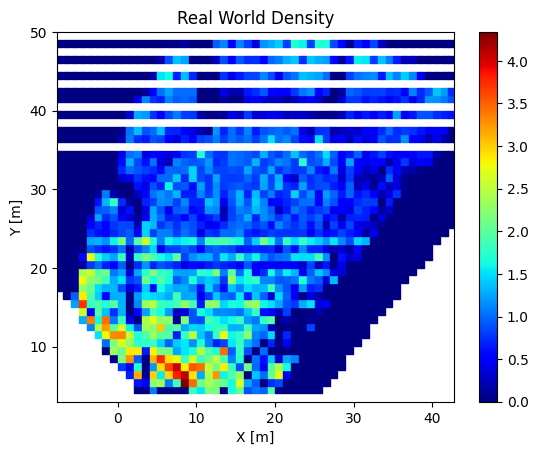

In [74]:
gridded_rw_density = []
x_min_rw = int(np.floor(x_coordinates.min()))
x_max_rw = int(np.ceil(x_coordinates.max()))
y_min_rw = int(np.floor(y_coordinates.min()))
y_max_rw = int(np.ceil(y_coordinates.max()))

indices_dict = {}
for x in range(x_min_rw, x_max_rw):
    for y in range(y_min_rw, y_max_rw):
        indices = np.where((x_coordinates >= x) & (x_coordinates < x+1) & (y_coordinates >= y) & (y_coordinates < y+1))
        if len(indices[0]) > 0:
            gridded_rw_density.append((x+0.5, y+0.5, np.sum(values[indices])))

# Create a scatter plot with colors mapped to z values
scatter = plt.scatter([point[0] for point in gridded_rw_density], [point[1] for point in gridded_rw_density], c=[point[2] for point in gridded_rw_density], cmap=cm.jet, marker='s', s=25)

# Add a color bar
plt.colorbar(scatter)

# Set the title and axis labels
plt.title('Real World Density')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.axis('equal')  # Ensure equal aspect ratio
plt.xlim(-5, 40)
plt.ylim(3, 50)

# Show the plot
plt.show()

# Checks for correct predict-backend implementation

In [88]:
from azure.storage.blob import BlobServiceClient
import json
import numpy as np

blob_service_client = BlobServiceClient.from_connection_string(
        "DefaultEndpointsProtocol=https;AccountName=tensorastorage;AccountKey=OTC+4iQJevvteUOTaTO+N7GYRJkuUNyEieCOGIdRwno9h7BByPMKBi5uRG50DgYICDoyqFn0ZraE+AStUQb4MQ==;EndpointSuffix=core.windows.net"
    )
blob_client = blob_service_client.get_blob_client("cc-images-bad-segeberg", "stage_right_standard_2024-05-22_19-43-37_transformed_density.json")

density = np.array(json.loads(blob_client.download_blob().readall()))

assert(len(density) == len(gridded_rw_density))
checks = []
for i in range(len(density)):
    for j in range(len(density[i])):
        if gridded_rw_density[i][j] == 0:
            checks.append(density[i][j] == 0)
        else:
            checks.append(round(density[i][j]/gridded_rw_density[i][j], 3) == 1)

print(all(checks))

True
